Anticipation of moving stimuli by retina
Nature 1999 M. Berry

Modeling the response of a ganglion cell with gain control

Update History: creation Jan 1, 2018 by CKC
Sept 20, 2018 to include spatial part



In [41]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# use of two Gussian (one inverted) to approx the receptive field

def rf(x):
    rc = 1.0
    rs = 1.3
    kc = 1.3
    ks = 1.0
    a = x*x/2/rc/rc
    b = x*x/2/rs/rs
    return kc*np.exp(-a) - ks*np.exp(-b)

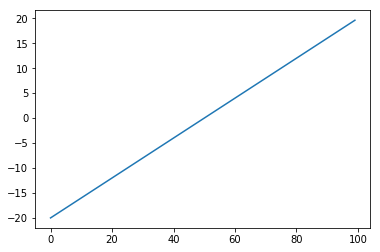

In [43]:
xnpts = 100
xrange = 40.

# x= [-xrange/2,xrange/2] with xnpts points
x_offset = -xrange/2

x = np.zeros(xnpts)
for i in range(xnpts):
    x[i] = xrange*(i/xnpts) + x_offset
# to see relation between index and position
plt.plot(x)
plt.show()

In [44]:
def xtoi(x,xnpts,xrange,x_offset): # convert position x into index i
    index = ((x-x_offset)/xrange)*xnpts
    return int(np.round(index))

[]

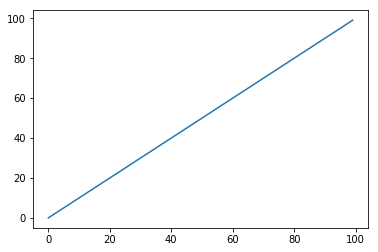

In [45]:
# to check xtoi is working correctly
index = np.zeros(xnpts)
for i in range(xnpts):
    index[i] = xtoi(x[i],xnpts,xrange,x_offset)
plt.plot(index)
plt.plot()

In [46]:
y = np.zeros(xnpts)
for i in range(xnpts):
    y[i] = rf(x[i])

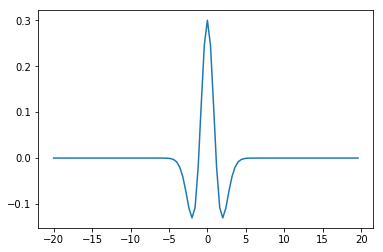

In [47]:
# plot receptive field y = rf(x)
plt.plot(x,rf(x)) # or plt.plot(x,y)
plt.show()

In [48]:
# a function to generate the position of a pulse with wdith = width and speed = speed
# initial position of the pulse is = x_init

def f_pulse(xnpts,xrange,x_offset,x_init,width,speed,x,t): #
    ix = xtoi(x,xnpts,xrange,x_offset) # x position in index of xnpts
    iwidth = (width/xrange)*xnpts # width: bar width in unit of bit; iwidth: actual bar width
    #pulse position
    xnow   = x_init + speed*t # current position in terms of x
    inow = xtoi(xnow,xnpts,xrange,x_offset) # current position of the pulse in index of xnpts
    index1 = int(inow - iwidth/2)
    index2 = int(inow + iwidth/2)
    value = 0
    if ix > index1 and ix <index2:
        value = 1
    return value
    

2
4
6
8
10
12
14
16
18
20


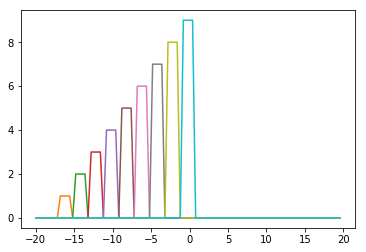

In [49]:
# a moving pulse

t = 20.0
speed = 1.0
x_init = x_offset
width = 2

y = np.zeros(xnpts)

for j in range(10):
    t = (j+1)*2
    print(t)
    for i in range(xnpts):
        y[i] =  j*f_pulse(xnpts,xrange,x_offset,x_init,width,speed,x[i],t)
    plt.plot(x,y) # plot the shape of the pulse at time t

plt.show()

In [50]:
# modeling biphasic response of ganglion cell
# This is an off cell

def k_t(a,b,c,t):
    return -a*np.sin(b*t)*np.exp(-c*t*t)

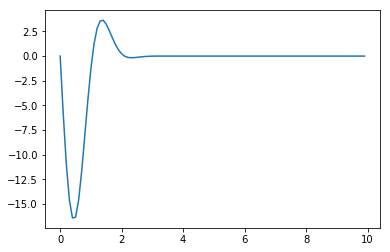

In [51]:
# check biphasic response

nstep = 100 # time step
t = 0.0
dt = 0.1
#Checking biphasic response

a = 20
b = 3.0
c = 0.8

f = np.zeros(nstep)
time = np.zeros(nstep)
for i in range(nstep):
    t = i*dt
    time[i] = t
    f[i] = k_t(a,b,c,t)

plt.plot(time,f)
plt.show()


In [52]:
k_t(a,b,c,0.1)

-5.863309529745853

In [53]:
# time kernel for ganglion response

def t_kernel(delay):
    a = 20
    b = 3.0
    c = 0.8
    if delay > 0:
        return -a*np.sin(b*delay)*np.exp(-c*delay*delay)
    else:
        return 0.0

## Convolution

$ u(t) = g(v)\int_\infty^{-\infty}dx\int_{-\infty}^t S(x',t')k(x-x',t-t')dt'$


$v(t) = \int_{-\infty}^t dt' u(t')B e^{{-\frac{t-t'}{\tau}}}$

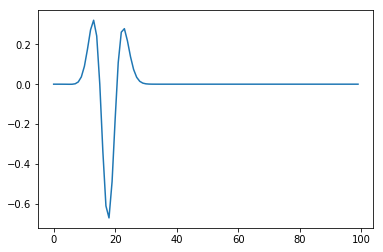

In [60]:
# convolution with a moving pulse

nstep = 100 # time step
t = 0.0
dt = 0.1
speed = 0.8
width = 1.0
    
cc = np.zeros(nstep)
tstep = np.zeros(nstep)
y = np.zeros(xnpts)
yrf = np.zeros(xnpts)

for j in range(xnpts):
    x[j] =  xrange*(j/xnpts) + x_offset
    yrf[j] = rf(x[j])

# compute response r(x) at t0
width = 1.0
t0 = 12*2
r = np.zeros(xnpts)

# xpi = x'_i 
# xmxpi = x-x'_i
for t0 in range(10,15,5):
    for ii in range(xnpts):
        x0 = x[ii]
        ssum = 0.0
        for i in range(xnpts):
            for j in range(t0+1):
                xpi = x[i]
                tpj = j
            #print(t0-tpj)
                s_xpi_tpj = f_pulse(xnpts,xrange,x_offset,x_init,width,speed,xpi,tpj)
                k_x0mxpi_t0mtpj = rf((x0-xpi))*t_kernel((t0-tpj))
                ssum = ssum + s_xpi_tpj*k_x0mxpi_t0mtpj

        r[ii]= ssum
    
    plt.plot(r)
plt.show()       

In [55]:
def feedback(u,npts,t0,B,tau):
    v= np.zeros(npts)
    for ii in range(npts):
        ssum = 0.0
        t=t0
        for j in range(t):
            tp = j
            ssum = ssum + u[ii,j]*np.exp(-(t-tp)/tau)*B
        v[ii] = ssum
    
    return v
# gain control

def gain(vv):
    val = 1
    if vv>0:
        val = 1/(1+vv**4)
    return val

def F(x,theta):
    if x < theta:
        return 0
    else:
        return x

0
1
2
3
4
5
6
7
8
9


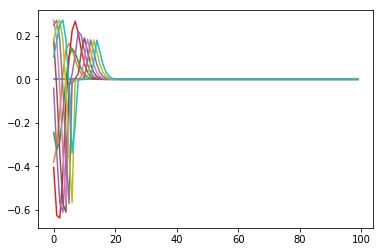

In [56]:
# convolution with a moving pulse

nstep = 10 # time step
t = 0.0
dt = 0.1
speed = 0.4

    
cc = np.zeros(nstep)
tstep = np.zeros(nstep)
y = np.zeros(xnpts)
yrf = np.zeros(xnpts)

for j in range(xnpts):
    x[j] =  xrange*(j/xnpts) + x_offset
    yrf[j] = rf(x[j])

# compute response r(x) at t0
width = 1.0
t0 = 12*2
r = np.zeros(xnpts)

# xpi = x'_i 
# xmxpi = x-x'_i

tau= 100
B = 5.0
n = xnpts
nstep=10

dt = 1
u=np.zeros((xnpts,nstep))
g = np.zeros(xnpts)
for i in range(xnpts):
    g[i]= 1

# compute the response at (x0,t0):u(x0,t0)

for t0 in range(nstep): # time point t0
    print(t0)
    for ii in range(xnpts): # spatial point x0
        x0 = x[ii]
        ssum = 0.0
        for i in range(xnpts): # convolution with x'
            for j in range(t0): # convolution of with t'
                xpi = x[i]
                tpj = j
            
            #print(t0-tpj)
                s_xpi_tpj = f_pulse(xnpts,xrange,x_offset,x_init,width,speed,xpi,tpj)
                k_x0mxpi_t0mtpj = rf((x0-xpi))*t_kernel((t0-tpj))
                ssum = ssum + s_xpi_tpj*k_x0mxpi_t0mtpj        
        r[ii]= g[ii]*ssum
        u[ii,t0] = ssum
        
    v = feedback(u,xnpts,t0,B,tau)# update the gain for next step
    
    for iii in range(xnpts):
        g[iii] = gain(v[iii])     # 
    plt.plot(r)
plt.show()      

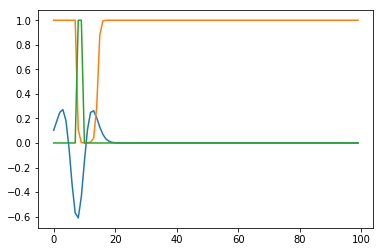

In [57]:
pf = np.zeros(xnpts)
r_out = np.zeros(xnpts)
for i in range(xnpts):
    pf[i]= f_pulse(xnpts,xrange,x_offset,x_init,width,speed,x[i],t0)
    r_out[i] = u[i,t0]
plt.plot(r_out)
plt.plot(g)
plt.plot(pf)
plt.show()

In [58]:
u[12,10]=0

IndexError: index 10 is out of bounds for axis 1 with size 10

In [ ]:
def feedback(u,npts,nstep,tstep,B,tau):
    v= np.zeros((npts,nstep))
    for ii in range(npts):      
        for i in range(nstep):
            t = i
            sum = 0.0
            for j in range(i):
                tp = j
                sum = sum + u[ii,j]*np.exp(-(t-tp)/tau)*B
            v[ii,i] = sum
    
    return v

In [ ]:
tau= 100
B = 0.1
n = xnpts
nstep=10
print(n,nstep)
v = feedback(u,n,nstep,tstep,B,tau)

In [ ]:
# applyng low pass filter
v = np.zeros(nstep)
tau = 100
B = 0.1
for i in range(nstep):
    t = tstep[i]
    sum = 0.0
    for j in range(i):
        tp = tstep[j]
        sum = sum + u[j]*np.exp(-(t-tp)/tau)*B
    v[i] = sum

plt.plot(tstep,v)
plt.plot(tstep,u)
plt.show()

In [ ]:
# gain control
def gain(vv):
    val = 1
    if vv>0:
        val = 1/(1+vv**4)
    return val
    

In [ ]:
g = np.zeros(nstep)
for i in range(nstep):
    g[i] = gain(v[i])
plt.plot(tstep,g)
plt.show()

In [ ]:
# convolution with gain control
nstep = 100 # time step
t = 0.0
dt = 0.1
speed = 4.0
width = 1
    
u = np.zeros(nstep)
v = np.zeros(nstep)
tstep = np.zeros(nstep)
y = np.zeros(xnpts)
yrf = np.zeros(xnpts)

for j in range(xnpts):
    x[j] =  xrange*(j/xnpts) + x_offset
    yrf[j] = rf(x[j])

# main loop here
g = np.zeros(nstep)
g[0] = 1.0

for i in range(nstep):# i is the index of time step
    t = i*dt
    tstep[i] = t
    ssum =0.0
    for k in range(nstep):
        tc = k*dt
        delay = t - tc
        val = t_kernel(delay)
        for j in range(xnpts):
            y[j]= f_pulse(xnpts,xrange,x_offset,x_init,width,speed,x[j],t)
            ssum = ssum + yrf[j]*y[j]*val
    u[i] = ssum*g[i]
    tau= 100
    B = 0.1
    t = tstep[i]
    ssum = 0.0
    for j in range(i):
        tp = tstep[j]
        ssum = ssum + u[j]*np.exp(-(t-tp)/tau)*B
    v[i] = ssum
    if i+1 < nstep-1:
        g[i+1] = gain(v[i]) # use v[i] to obtain g[i+1]; not equal time!!!
    
plt.plot(tstep,u)
plt.show()

In [ ]:
plt.plot(tstep,u)
plt.plot(tstep,v)
plt.plot(tstep,g)
plt.show()

In [ ]:
tau= 100
B = 0.1
n = 1
v = feedback(u,n,nstep,tstep,B,tau)
plt.plot(tstep,v)
plt.plot(tstep,u)
plt.show()

In [ ]:
plt.plot(tstep,cc,'r') # without gain control
plt.plot(tstep,u,'b') # with gain control
plt.plot(tstep,g,'g') # gain function
plt.show() 

In [ ]:
def F(x,theta):
    if x < theta:
        return 0
    else:
        return x

In [ ]:
theta = 0.1
length = 100
result = np.zeros(length)
for i in range(length):
    result[i] = F(u[i],theta)
plt.plot(result)
plt.show()